# When Does The Moon Rise in Accra, Ghana on 2020-10-20

## Authors: 
Jielai Zhang

## Learning Goals:
- Find time now in Python
- Learn how to define parameters for a telescope observatory in Python
- Learn how to find out sunset and sunrise times for the telescope observatory in Python

## Keywords
Astroplan, observing preparation

## Summary
This tutorial describes how to get the location information for an observatory, get the position information for an object in the sky and find out what time it will rise on a given date. The exercise will be done using Universal Time.

In [43]:
from astropy.time import Time
from astroplan import download_IERS_A 
from astropy.coordinates import EarthLocation
from astroplan import Observer
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

### Question 1
What is your name? Print it out.

In [5]:
# Fill in this cell with your name, and print out your name using the print statement.
applicant_name = 'Jielai Zhang'
print('My name is',applicant_name)

My name is Jielai Zhang


### What is the current UTC?

In [6]:
now = Time.now()
print(now)
print(now.decimalyear)

2020-10-22 22:44:06.862428
2020.8085991848318


### How much time has passed since WAISSYA 2019 (WAISSYA is now named PASEA)

In [7]:
time_pasea2019 = Time("2019-11-02", format='iso')
time_passed    = now-time_pasea2019
print(time_passed,'days')

355.9473016484722 days


### Check to see what observatories are available in the "EarthLocation" database.

In [8]:
print((EarthLocation.get_site_names()))

['', '', '', 'ALMA', 'ATST', 'Anglo-Australian Observatory', 'Apache Point', 'Apache Point Observatory', 'Atacama Large Millimeter Array', 'BAO', 'BBSO', 'Beijing XingLong Observatory', 'Black Moshannon Observatory', 'CHARA', 'Canada-France-Hawaii Telescope', 'Catalina Observatory', 'Cerro Pachon', 'Cerro Paranal', 'Cerro Tololo', 'Cerro Tololo Interamerican Observatory', 'DCT', 'DKIST', 'Discovery Channel Telescope', 'Dominion Astrophysical Observatory', 'GBT', 'Gemini South', 'Green Bank Telescope', 'Hale Telescope', 'Haleakala Observatories', 'Happy Jack', 'IAO', 'JCMT', 'James Clerk Maxwell Telescope', 'Jansky Very Large Array', 'Keck Observatory', 'Kitt Peak', 'Kitt Peak National Observatory', 'La Silla Observatory', 'Large Binocular Telescope', 'Las Campanas Observatory', 'Lick Observatory', 'Lowell Observatory', 'MWA', 'Manastash Ridge Observatory', 'McDonald Observatory', 'Medicina', 'Medicina Dish', 'Michigan-Dartmouth-MIT Observatory', 'Mount Graham International Observatory'

### Setting up observatory location

In [9]:
location  = EarthLocation.of_site("Cerro Tololo")
CerroTololo = Observer(location = location, timezone = 'America/Santiago',
                             name = "CT", description = "Cerro Tololo Telescope")

### Question 2
What is the Longtitude, Latitutde and Elevation of the Cerro Tololo Telescope as specified here?

In [64]:
# Fill in this cell to print the Longitude, Latitutde and Elevation inforamtion of the Cerro Tololo Telescope
# I have not told you how to do this, have a think and try printing a few things until it works. 
# You are free to do searches on google, though it may take longer than just trying to print things until it works.
print(CerroTololo)

<Observer: name='CT',
    location (lon, lat, el)=(-70.815 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>


In [11]:
download_IERS_A()


### Sunset, Sunrise, Midnight

In [31]:
# Calculating the sunset, sunrise times for our observatory 
sunset_CT = CerroTololo.sun_set_time(now, which='nearest')
sunrise_CT = CerroTololo.sun_rise_time(now, which='next')

# Print sunset_CT and sunset_CT.iso to see what the difference is
print('Tests:')
print(sunset_CT)
print(sunset_CT.iso)
print('')

# Print out the sunset and sunrise times in the nicer way.
print('Sunset and Sunrise:')
print("Sunset at Cerro Tololo will be at {0.iso} UTC".format(sunset_CT))
print("Sunrise at Cerro Tololo will be at {0.iso} UTC".format(sunrise_CT))

Tests:
2459145.454637384
2020-10-22 22:54:40.670

Sunset and Sunrise:
Sunset at Cerro Tololo will be at 2020-10-22 22:54:40.670 UTC
Sunrise at Cerro Tololo will be at 2020-10-23 10:00:03.645 UTC


### Question 3
Find the effective length of time (in hours) between sunset and sunrise in Cerre Tololo tonight.

In [65]:
# Fill in this cell to print number of hours between sunset and sunrise during the next night in Cerro Tololo.
# I have not told you how to do this, have a think and try printing a few things until it works. 
# You are free to do searches on google, though it may take longer than just trying to print things until it works.
print((sunrise_CT-sunset_CT)*24)

11.089715369045734


### Question 4
What is the moonrise and moonset time in Cerro Tololo?

In [15]:
# Fill in this cell to print out the next moonrise and moon
# set time in Cerro Tololo

ms_CT = CerroTololo.moon_set_time(now, which='nearest')
mr_CT = CerroTololo.moon_rise_time(now, which='next')

print("Moonrise at Cerro Tololo will be at {0.iso} UTC".format(mr_CT))
print("Moonset at Cerro Tololo will be at {0.iso} UTC".format(ms_CT))

Moonrise at Cerro Tololo will be at 2020-10-23 16:01:22.007 UTC
Moonset at Cerro Tololo will be at 2020-10-23 05:24:50.617 UTC


### Question 5 (a)
Turn sunset_CT, sunrise_CT, moonset_CT and moonrise_CT into datetime objects. 

In [62]:
sunset_CT_dt = datetime.strptime(sunset_CT.iso, '%Y-%m-%d %H:%M:%S.%f')
sunrise_CT_dt = datetime.strptime(sunrise_CT.iso, '%Y-%m-%d %H:%M:%S.%f')
moonrise_CT_dt = datetime.strptime(mr_CT.iso, '%Y-%m-%d %H:%M:%S.%f')
moonset_CT_dt = datetime.strptime(ms_CT.iso, '%Y-%m-%d %H:%M:%S.%f')

### Question 5 (b)
Plot the sunset, sunrise, moonset, moonrise times on a plot as verticle lines of different colours. Inlcude a legend, plot title and x-axis label. You are free to set the y-axis range as you like.

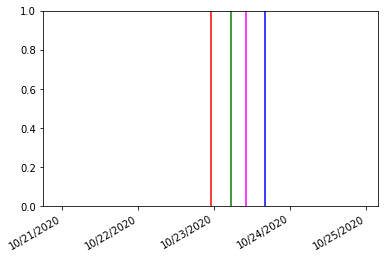

In [63]:

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.axvline(x=sunset_CT_dt,color='red')
plt.axvline(x=sunrise_CT_dt,color='magenta')
plt.axvline(x=moonset_CT_dt,color='green')
plt.axvline(x=moonrise_CT_dt,color='blue')
plt.gcf().autofmt_xdate()